# Data Wrangling


# Part 1: Gathering

### Import Libraries

In [241]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
from tweepy import OAuthHandler
from timeit import default_timer as timer

In [242]:
pd.options.display.max_colwidth = 143

In [243]:
## Load twitter archive enhanced file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv', sep = ',')
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
115,870374049280663552,NaN,NaN,2017-06-01 20:18:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She really likes the planet. Would hate to see willful ignorance and the denial of fairly elemental science destroy it. 13/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/870374049280663552/photo/1,13,10,Zoey,None,None,None,None
989,748932637671223296,NaN,NaN,2016-07-01 17:33:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Divine Doggo. Must be magical af. 13/10 would be an honor to pet https://t.co/BbcABzohKb,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748932637671223296/photo/1,13,10,Divine,doggo,None,None,None
385,826848821049180160,NaN,NaN,2017-02-01 17:44:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cupid. He was found in the trash. Now he's well on his way to prosthetic front legs and a long happy doggo life. 13/10 heroic af ht...,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/826848821049180160/photo/1,https://twitter.com/dog_rates/status/826848821049180160/photo/1,https://twi...",13,10,Cupid,doggo,None,None,None
1037,744709971296780288,NaN,NaN,2016-06-20 01:54:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Harvey. He's stealthy af. 10/10 would do my best to pet https://t.co/zAzaRT6NnT,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744709971296780288/photo/1,10,10,Harvey,None,None,None,None
1611,685325112850124800,NaN,NaN,2016-01-08 05:00:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Tristan do not speak to me with that kind of tone or I will take away the Xbox."" 10/10 https://t.co/VGPH0TfESw",NaN,NaN,NaN,https://twitter.com/dog_rates/status/685325112850124800/photo/1,10,10,None,None,None,None,None


In [244]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as f:
    f.write(response.content)

In [245]:
## read the image predictions file
t_image = pd.read_csv('image_predictions.tsv', sep='\t')
t_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
274,670833812859932673,https://pbs.twimg.com/media/CU9HyzSWIAAVcte.jpg,1,Pekinese,0.609853,True,Persian_cat,0.265442,False,Japanese_spaniel,0.027460,True
1567,794205286408003585,https://pbs.twimg.com/media/CwWVe_3WEAAHAvx.jpg,3,pedestal,0.662660,False,fountain,0.294827,False,brass,0.020371,False
293,671347597085433856,https://pbs.twimg.com/media/CVEbFDRWsAAkN_7.jpg,1,picket_fence,0.382918,False,rain_barrel,0.108809,False,plastic_bag,0.038878,False
399,673686845050527744,https://pbs.twimg.com/media/CVlqi_AXIAASlcD.jpg,1,Pekinese,0.185903,True,guinea_pig,0.172951,False,pug,0.166183,True
971,706593038911545345,https://pbs.twimg.com/media/Cc5Snc7XIAAMidF.jpg,1,four-poster,0.696423,False,quilt,0.189312,False,pillow,0.029409,False


### Twitter API & JSON

In [246]:
consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'


auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [247]:
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [248]:
t_df = pd.read_json('tweet_json.txt', lines=True)

In [249]:
#saving info to dataframe
t_df = pd.DataFrame(columns=['tweet_id', 'retweet_count','favorite_count'])

with open('tweet_json.txt') as f:
     for line in f:
        status = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
       
        t_df = t_df.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
                                      columns = ['tweet_id', 'retweet_count', 'favorite_count']))
t_df = t_df.reset_index(drop = True)
t_df.sample(10)

,tweet_id,retweet_count,favorite_count
1263,709901256215666688,112,732
546,805520635690676224,1905,6368
1216,714957620017307648,1595,4503
1020,746542875601690625,2104,5520
1760,678643457146150913,489,2250
277,840268004936019968,6497,20950
2143,669926384437997569,115,400
846,766069199026450432,1003,4765
907,757725642876129280,1391,5022
1277,708845821941387268,1015,3226


# Part 2: Assessing

In [250]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [251]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [252]:
t_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [253]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


In [254]:
import re 

twitter_archive[twitter_archive.text.str.contains(r"(\d+\.\d*\/\d+)")]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None


## Quality

- timestamp not datetime format 
- The retweeted_status_timestamp should be DateTime
- Clean up data, Remove tweets that do not contain pictures 
- name column: none appears 745 (missing data)
- name column: some names are false
- Some dog have an incorrect name
- Retweeted data included in df

## Tidiness

- Dog stage is in 4 columns (doggo, floofer, pupper, puppo), no need for that.
- Merge t_df and t_image to df_clean.

# Part 3: Cleaning

In [255]:
# new duplicate dataframes
t1 = twitter_archive.copy()
t2 = t_image.copy()
t3 = t_df.copy()

## Define
- The retweeted_status_timestamp should be DateTime

### Code

In [256]:
t1 = pd.read_csv('twitter-archive-enhanced.csv',
               dtype={'tweet_id': 'object',
                     'in_reply_to_status_id': 'object',
                     'in_reply_to_user_id': 'object',
                     'retweeted_status_id': 'object',
                     'retweeted_status_user_id':'object'},
               parse_dates = ['timestamp'])

### Test

In [257]:
t1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1), 

## Define

- Convert image_predictions tweet_id datatype to object

### Code 

In [258]:
t2.tweet_id = t2.tweet_id.astype(str)

### Test

In [259]:
t2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


## Define

- To change t_df retweet_count and favorite_count from object to integer datatype

### Code

In [260]:
t3.retweet_count = t3.retweet_count.astype(int)
t3.favorite_count = t3.favorite_count.astype(int)

### Test

In [261]:
t3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


## Define

- There are some missing values in Name

### Code

In [262]:
a = t1.name.str.islower()
column_name = 'name'
t1.loc[a, column_name] = np.nan
t1.name.replace("None", np.nan, inplace = True)

### Test 

In [263]:
t1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
573,801167903437357056,NaN,NaN,2016-11-22 20:58:07,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Milo. I would do terrible things for Milo. 13/10 https://t.co/R6wJyC2Tey,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801167903437357056/photo/1,13,10,Milo,None,None,None,None
1551,689143371370250240,NaN,NaN,2016-01-18 17:52:38,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Trip. He likes wearing costumes that aren't consistent with the season to screw with people 10/10 tricky pupper https://t.co/40w7TI5Axv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689143371370250240/photo/1,10,10,Trip,None,None,pupper,None
123,868880397819494401,NaN,NaN,2017-05-28 17:23:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter https://t.co/r28jFx9uyF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/868880397819494401/photo/1,14,10,Walter,None,None,None,None
1308,707297311098011648,NaN,NaN,2016-03-08 20:09:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She can go from sweet to scary af in a matter of seconds. 10/10 points deducted for cats on pajamas https://t.co/B6dmZmJBdK,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/707297311098011648/photo/1,https://twitter.com/dog_rates/status/707297311098011648/photo/1",10,10,Cassie,None,None,None,None
1759,678740035362037760,NaN,NaN,2015-12-21 00:53:29,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Tango. He's a large dog. Doesn't care much for personal space. Owner isn't very accepting. Tongue slip. 6/10 https://t.co/p2T5kGebxe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678740035362037760/photo/1,6,10,Tango,None,None,None,None


## Define

- To change column headers in image_predictions

### Code

In [264]:

t2 = t2.rename(columns = {'img_num':'image_number',
                       'p1': 'prediction_1',
                       'p1_conf':'prediction_1_confidence',
                       'p1_dog':'prediction_1_dog',
                       'p2': 'prediction_2',
                       'p2_conf':'prediction_2_confidence',
                       'p2_dog':'prediction_2_dog',
                       'p3': 'prediction_3',
                       'p3_conf':'prediction_3_confidence',
                       'p3_dog':'prediction_3_dog'})

### Test

In [265]:
list(t2)

['tweet_id',
 'jpg_url',
 'image_number',
 'prediction_1',
 'prediction_1_confidence',
 'prediction_1_dog',
 'prediction_2',
 'prediction_2_confidence',
 'prediction_2_dog',
 'prediction_3',
 'prediction_3_confidence',
 'prediction_3_dog']

## Define

- Remove null values in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp 

### Code

In [266]:
t1 = t1[t1.retweeted_status_id.isnull()]
t1 = t1[t1.retweeted_status_user_id.isnull()]
t1 = t1[t1.retweeted_status_timestamp.isnull()]

In [267]:
t1.retweeted_status_id.isnull().sum()

2175

In [268]:
t1.retweeted_status_user_id.isnull().sum()

2175

In [269]:
t1.retweeted_status_timestamp.isnull().sum()

2175

In [270]:
t1.retweeted_status_id.value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

In [271]:
t1.retweeted_status_timestamp.value_counts()

Series([], Name: retweeted_status_timestamp, dtype: int64)

Drop columns has empty value

In [272]:
t1.drop(['retweeted_status_id',
         'retweeted_status_user_id',
         'retweeted_status_timestamp'], axis = 1, inplace = True)

### Test

In [273]:
list(t1)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

Fix error rating_numerator of twitter_archive 

### Code

In [274]:
t1[t1.text.str.contains(r"(\d+\.\d*\/\d+)")]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back h...,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394486558024e+17,4196983835.0,2015-12-28 05:07:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,5,10,NaN,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,NaN,None,None,None,None


In [275]:
ratings_fix = ["This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
             "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back",
             "I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace",
            "Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD"]

In [276]:
for entry in ratings_fix:
    mask = t1.text == entry
    column_name1 = 'rating_numerator'
    column_name2 = 'rating_denominator'
    t1.loc[mask, column_name1] = re.findall(r"\d+\.\d+", entry)
    t1.loc[mask, column_name2] = 10
   

 t1.set_value(763, 'rating_numerator', 11.27, takeable=False)

'''    
def find_rating(col_val):
   # do things

df.col.apply(find_rating)
'''

IndentationError: unindent does not match any outer indentation level (<ipython-input-276-92705670f1bd>, line 9)

### Test

In [277]:
t1[t1.text.str.contains(r"(\d+\.\d*\/\d+)")]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back h...,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394486558024e+17,4196983835.0,2015-12-28 05:07:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,5,10,NaN,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,NaN,None,None,None,None


In [278]:
t1.doggo.replace('None','',inplace = True)
t1.floofer.replace('None','',inplace = True)
t1.pupper.replace('None','',inplace = True)
t1.puppo.replace('None','',inplace = True)

### Code

In [279]:
t1['dog_stages'] = t1.doggo+t1.floofer+t1.pupper+t1.puppo


In [280]:
t1.dog_stages.value_counts()

                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stages, dtype: int64

In [281]:
#To divide doggopupper,doggopuppo, doggofloofer
t1.loc[t1.dog_stages == 'doggopupper', 'breed_stage'] = 'doggo,pupper'
t1.loc[t1.dog_stages == 'doggopuppo', 'breed_stage'] = 'doggo,puppo'
t1.loc[t1.dog_stages == 'doggofloofer', 'breed_stage'] = 'doggo,floofer'

In [282]:
# To change values to Nan values
t1.loc[t1.dog_stages == '', 'breed_stage'] = np.nan

In [283]:
t1.dog_stages.value_counts()


                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stages, dtype: int64

In [284]:
# #Drop the doggo,floofer,pupper,puppo
t1.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)


### Test

In [285]:
t1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,breed_stage
2251,667806454573760512,NaN,NaN,2015-11-20 20:47:20,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Filup. He is overcome with joy after finally meeting his father. 10/10 https://t.co/TBmDJXJB75,https://twitter.com/dog_rates/status/667806454573760512/photo/1,10,10,Filup,,NaN
774,776218204058357768,NaN,NaN,2016-09-15 00:36:55,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Atlas rolled around in some chalk and now he's a magical rainbow floofer. 13/10 please never take a bath https://t.co/nzqTNw0744,"https://twitter.com/dog_rates/status/776218204058357768/photo/1,https://twitter.com/dog_rates/status/776218204058357768/photo/1,https://twi...",13,10,NaN,floofer,NaN
1364,702899151802126337,NaN,NaN,2016-02-25 16:53:11,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Say hello to Luna. Her tongue is malfunctioning (tragic). 12/10 please enjoy (vid by @LilyArtz) https://t.co/F9aLnADVIw,https://vine.co/v/i6iIrBwnTFI,12,10,Luna,,NaN
336,832636094638288896,NaN,NaN,2017-02-17 17:01:29,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Orion. He just got back from the dentist. Cavity free af. 12/10 would give extra pats https://t.co/Y4DZx2UWsr,https://twitter.com/dog_rates/status/832636094638288896/photo/1,12,10,Orion,,NaN
830,768855141948723200,NaN,NaN,2016-08-25 16:58:45,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jesse. He really wants a belly rub. Will be as cute as possible to achieve that goal. 11/10 https://t.co/1BxxcdVNJ8,https://twitter.com/dog_rates/status/768855141948723200/photo/1,11,10,Jesse,,NaN


## Define

- Merge the dataframes

### Code

In [286]:
df = pd.merge(t1, t2, on = 'tweet_id', how = 'inner')


In [287]:
df = pd.merge (df, t3, on = 'tweet_id', how = 'inner')


In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 25 columns):
tweet_id                   1994 non-null object
in_reply_to_status_id      23 non-null object
in_reply_to_user_id        23 non-null object
timestamp                  1994 non-null datetime64[ns]
source                     1994 non-null object
text                       1994 non-null object
expanded_urls              1994 non-null object
rating_numerator           1994 non-null int64
rating_denominator         1994 non-null int64
name                       1350 non-null object
dog_stages                 1994 non-null object
breed_stage                11 non-null object
jpg_url                    1994 non-null object
image_number               1994 non-null int64
prediction_1               1994 non-null object
prediction_1_confidence    1994 non-null float64
prediction_1_dog           1994 non-null bool
prediction_2               1994 non-null object
prediction_2_confidence    1994

In [289]:
# Store 
df.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

# Analysis and Visualizations

In [290]:
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 25 columns):
tweet_id                   1994 non-null int64
in_reply_to_status_id      23 non-null float64
in_reply_to_user_id        23 non-null float64
timestamp                  1994 non-null object
source                     1994 non-null object
text                       1994 non-null object
expanded_urls              1994 non-null object
rating_numerator           1994 non-null int64
rating_denominator         1994 non-null int64
name                       1350 non-null object
dog_stages                 306 non-null object
breed_stage                11 non-null object
jpg_url                    1994 non-null object
image_number               1994 non-null int64
prediction_1               1994 non-null object
prediction_1_confidence    1994 non-null float64
prediction_1_dog           1994 non-null bool
prediction_2               1994 non-null object
prediction_2_confidence    1994 non-nul

In [291]:
df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,prediction_1_confidence,prediction_1_dog,prediction_2,prediction_2_confidence,prediction_2_dog,prediction_3,prediction_3_confidence,prediction_3_dog,retweet_count,favorite_count
1967,666373753744588802,NaN,NaN,2015-11-16 21:54:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Those are sunglasses and a jean jacket. 11/10 dog cool af https://t.co/uHXrPkUEyl,https://twitter.com/dog_rates/status/666373753744588802/photo/1,11,10,NaN,...,0.326467,True,Afghan_hound,0.259551,True,briard,0.206803,True,100,194
1751,670465786746662913,NaN,NaN,2015-11-28 04:54:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Silly dog here. Wearing bunny ears. Nice long tail. Unique paws. Not crazy soft but will do. Extremely agile. 7/10 https://t.co/2BnCLtJMxD,https://twitter.com/dog_rates/status/670465786746662913/photo/1,7,10,NaN,...,0.611558,False,tailed_frog,0.186484,False,common_newt,0.078694,False,608,1048
294,826115272272650244,NaN,NaN,2017-01-30 17:10:04,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ike. He's demonstrating the pupmost restraint. 13/10 super good boy https://t.co/6gHoGah9nm,https://twitter.com/dog_rates/status/826115272272650244/photo/1,13,10,Ike,...,0.997071,False,golden_retriever,0.002331,True,kuvasz,0.000283,True,3599,17299
655,759197388317847553,NaN,NaN,2016-07-30 01:22:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Luna. She's just heckin precious af I have nothing else to say. 12/10 https://t.co/gQH2mmKIJW,"https://twitter.com/dog_rates/status/759197388317847553/photo/1,https://twitter.com/dog_rates/status/759197388317847553/photo/1,https://twi...",12,10,Luna,...,0.511341,True,golden_retriever,0.076899,True,white_wolf,0.063269,False,2221,6725
1005,707995814724026368,NaN,NaN,2016-03-10 18:25:30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Farfle. He lost his back legs during the Battle of Gettysburg. Goes 0-60 in 4.3 seconds (damn) 12/10 hero af https://t.co/NiQQWzIzzq,https://twitter.com/dog_rates/status/707995814724026368/photo/1,12,10,Farfle,...,0.172087,False,Gila_monster,0.126978,False,lumbermill,0.050400,False,1273,3385


In [293]:
#favorite_Tweet
df.sort_values('favorite_count', ascending=False)[['tweet_id','favorite_count']].head()

,tweet_id,favorite_count
309,822872901745569793,132810
775,744234799360020481,131075
58,879415818425184262,107956
400,807106840509214720,107015
108,866450705531457537,106827


In [294]:
# Highest retweet
df.sort_values('retweet_count', ascending=False)[['tweet_id','retweet_count']].head()

,tweet_id,retweet_count
775,744234799360020481,79515
400,807106840509214720,56625
810,739238157791694849,52360
309,822872901745569793,48265
58,879415818425184262,45849


In [295]:
# lowest retweet
df.sort_values('retweet_count', ascending=True)[['tweet_id','retweet_count']].head()

,tweet_id,retweet_count
1977,666102155909144576,16
1957,666447344410484738,23
1865,668291999406125056,34
1975,666268910803644416,37
1989,666049248165822465,41


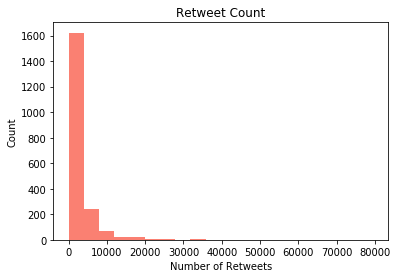

In [298]:
#Show the histogram of retweet count
import matplotlib.pyplot as plt
plt.hist(df['retweet_count'], bins = 20, color='salmon')
plt.title("Retweet Count")
plt.xlabel("Number of Retweets")
plt.ylabel("Count")

#show the plot
plt.show()

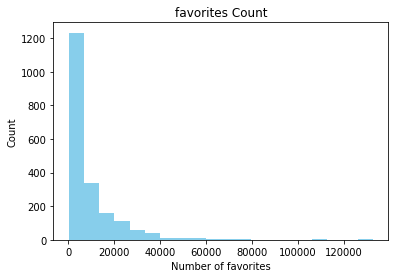

In [299]:
plt.hist(df['favorite_count'], bins = 20, color='skyblue')
plt.title("favorites Count")
plt.xlabel("Number of favorites")
plt.ylabel("Count")
#Display the plot
plt.show()

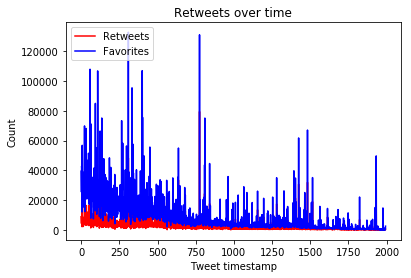

In [302]:
df['retweet_count'].plot(color = 'red', label='Retweets')
df['favorite_count'].plot(color = 'blue', label='Favorites')

plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets over time')
plt.savefig('retweets_favorites.png')
plt.show()